## ライブラリのインポート

In [1]:
import numpy as np
# ワインの計測データ
from sklearn.datasets import load_wine
# 訓練データと検証データの分割
from sklearn.model_selection import train_test_split
# データを扱う
import pandas as pd
# 予測結果の精度表示
from sklearn import metrics
# グラフ描画
from matplotlib import pyplot as plt
import japanize_matplotlib

C:\Users\takasaki\Anaconda3\envs\matplotlib\lib\site-packages\japanize_matplotlib\japanize_matplotlib.py:15: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


In [2]:
import torch
# 自動微分の関数 
from torch.autograd import Variable
# ニューラルネットワークの関数
import torch.nn as nn
# 活性化関数
import torch.nn.functional as F
# 最適化のアルゴリズムの関数
import torch.optim as optim
#ユーティリティのデータから
from torch.utils.data import DataLoader ,TensorDataset

# テスト用データの読み込み

In [3]:
wine = load_wine()
wine_data=wine.data
wine_target=wine.target

In [4]:
print(wine_target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [4]:
# ワインの計測データの各項目
# 1. alcohol アルコール濃度
# 2. malic_acid リンゴ酸
# 3. ash 灰（？
# 4. alcalinity_of_ash 灰のアルカリ成分（？
# 5. magnesium マグネシウム
# 6. total_phenols 総フェノール類量
# 7. flavanoids フラボノイド（ポリフェノールらしい）
# 8. nonflavanoid_phenols 非フラボノイドフェノール類
# 9. proanthocyanins プロアントシアニジン（ポリフェノールの一種らしい）
# 10. color_intensity 色の強さ
# 11. hue 色合い
# 12. od280/od315_of_diluted_wines ワインの希釈度合い
# 13. proline プロリン（アミノ酸の一種らしい）

# ワインの計測データを表形式で表示
df_x=pd.DataFrame(wine.data ,columns=wine.feature_names)
df_x.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


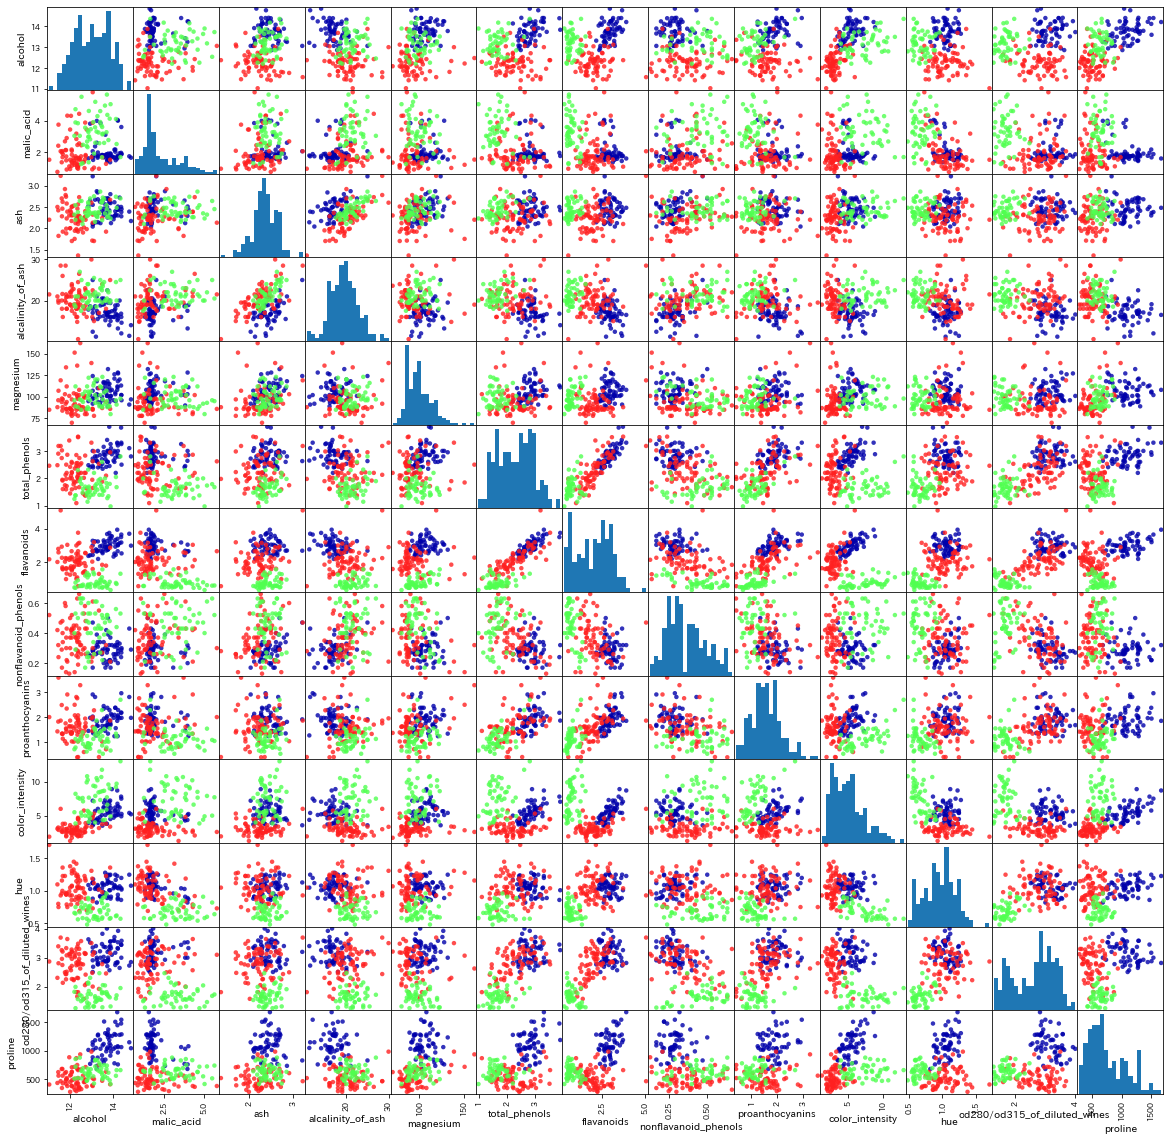

In [5]:
# DataFrameからscatter_matrixを作成
from pandas.plotting import scatter_matrix
import mglearn
grr = scatter_matrix(df_x, c=wine.target, figsize=(20, 20), marker='o', hist_kwds={'bins': 20}, s=20, alpha=.8, cmap=mglearn.cm3)
plt.show()

## 訓練データと検証データに分割する

In [6]:
# 訓練データと検証データの分割
# random_stateは再現性を確保するために指定する
x=wine_data
# 出力データの値の個数で配列を作り、全ての値を0にする
y = np.zeros((len(wine.target), 1 + wine.target.max()), dtype=int)
# 値が 0 ならインデックス 0 の値を１にする
# 値が 1 ならインデックス 1 の値を１にする
# 値が 2 ならインデックス 2 の値を１にする
y[np.arange(len(wine.target)), wine.target] = 1
X_train,X_test,Y_train,Y_test=train_test_split(x, y, test_size=0.25, random_state=1) 

In [7]:
# 出力データ
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [8]:
# 出力データ（変換後）
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1,

## PyTorchのテンソルに変換

In [9]:
# numpy の値を torch の値に変換する
X_train = torch.from_numpy(X_train).float()
Y_train = torch.from_numpy(Y_train).float()
X_test  = torch.from_numpy(X_test).float()
Y_test  = torch.from_numpy(Y_test).float()

In [10]:
# 行数、列数の確認
in_size=X_train.shape[1]
X_train.shape

torch.Size([133, 13])

In [11]:
out_size=Y_train.shape[1]
Y_train.shape

torch.Size([133, 3])

In [12]:
# x と y の値をひとつの変数に格納する
train = TensorDataset(X_train ,Y_train)

In [13]:
# batch_size ：学習する時にまとめるデータ数
# shuffle    : データをランダムに並び替える場合はTrue
train_loader = DataLoader(train ,batch_size=15, shuffle=True)

# ニューラルネットワークの定義

ニューラルネットワークのノード数や階層を定義する \
出力値を求める関数を定義する（ノード数によって変わる、求めたい値によっても変わる）

In [14]:
# Module を継承して、Netクラスを作成する
#  ノード数や階層を増やす　⇒　精度が向上する、学習のパフォーマンスは落ちる
#  ノード数や階層を減らす　⇒　精度が下がる、学習のパフォーマンスは上がる
#   　ノードや階層を変更しても精度が上がらない　⇒　入力データが不足している
class Net(nn.Module):
    # 初期化の関数
    def __init__(self):
        super(Net ,self).__init__()
        #   中間層のノード数は、精度向上やパフォーマンス向上を狙って調整する
        self.fc1 = nn.Linear(in_size , 128)         # nn.Linear (入力のノード数 , 中間層ノード数)
        self.fc2 = nn.Linear(128 , 32)             # nn.Linear (中間層ノード数 , 中間層ノード数)
        self.fc3 = nn.Linear(32,  out_size)        # nn.Linear (中間層ノード数 , 出力のノード数)
    
    # ネットワークを通して、出力値を求める関数
    def forward(self ,x):
        x = F.sigmoid(self.fc1(x))              # 入力のノードを中間層（１階層目）に渡して結果を得る
        x = F.sigmoid(self.fc2(x))              # 中間層（１階層目）を中間層（２階層目）に渡して結果を得る
        x = self.fc3(x)                         # 中間層（２階層目）の結果を出力層に渡す
        # dim　:求めたい確率の値　今回は１になる確率
        return F.log_softmax(x , dim=1)

# 学習する

In [15]:
# モデルの定義
model = Net()
# 損失の定義 (平均二乗誤差)
criterion = nn.MSELoss()

In [16]:
# 最適化のアルゴリズムの選択　（Adam：Stochastic Gradient Descent）
## model.parameters  調整する値
## lr(learning rate) ：学習率　どれぐらいの幅でパラメータを更新していくのか
optimizer = optim.Adam(model.parameters() , lr=0.0001)

In [17]:
loss_list = []
loss_temp = 0
# トレーニングの回数分ループする。
for epoch in range(2000):
    # 損失を初期化　
    total_loss = 0
    
    # データの件数分ループする。（x_train , y_train　に１レコードずつ格納される）
    for x_train , y_train in train_loader:
        # Variable ：　torch,autograd.Variable  ：テンソルをwrapして計算操作を記録する
        x_train ,y_train = Variable(x_train) ,Variable(y_train)
        # 出力を計算する 
        output = model(x_train)
        # 損失の計算 (出力の結果；output と 正解：y_trainを渡す)
        loss = criterion(output ,y_train)
        # パラメータの勾配を初期化する
        optimizer.zero_grad()
        # ロスを伝播する
        loss.backward()
        # パラメータを更新する
        optimizer.step()
        # トータルロスを格納
        total_loss += loss.item()
        loss_temp += loss

    # 10回毎に回数とトータルロスを表示する
    if (epoch+1)%100 == 0:
        loss_list.append(loss.item()/(10*len(train_loader)))
        print(f'Epoch {epoch+1} Loss {loss.item()/(10*len(train_loader))} -- {loss_temp}')
        loss_temp = 0

C:\Users\takasaki\Anaconda3\envs\matplotlib\lib\site-packages\torch\nn\functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 100 Loss 0.02472463713751899 -- 2023.8291015625
Epoch 200 Loss 0.024519133567810058 -- 1999.52490234375
Epoch 300 Loss 0.02448377079433865 -- 1987.4898681640625
Epoch 400 Loss 0.02435684733920627 -- 1980.490234375
Epoch 500 Loss 0.024423429701063367 -- 1977.755615234375
Epoch 600 Loss 0.024325227737426756 -- 1976.6195068359375
Epoch 700 Loss 0.0244044648276435 -- 1976.034912109375
Epoch 800 Loss 0.024425649642944337 -- 1975.55517578125
Epoch 900 Loss 0.02431402736239963 -- 1975.1102294921875
Epoch 1000 Loss 0.024380718337164986 -- 1974.6845703125
Epoch 1100 Loss 0.02433697117699517 -- 1974.29296875
Epoch 1200 Loss 0.024337265226576064 -- 1973.8887939453125
Epoch 1300 Loss 0.024512086974249947 -- 1973.5782470703125
Epoch 1400 Loss 0.02438128259446886 -- 1973.2203369140625
Epoch 1500 Loss 0.024327140384250216 -- 1972.903076171875
Epoch 1600 Loss 0.02435448169708252 -- 1972.5911865234375
Epoch 1700 Loss 0.02434158855014377 -- 1972.2615966796875
Epoch 1800 Loss 0.024285946951972115 -

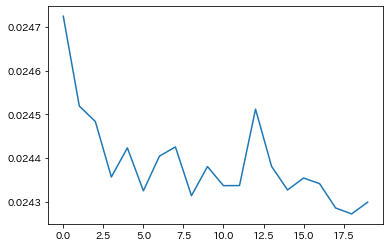

In [18]:
# ロスのプロット
plt.plot(loss_list)

## 誤差の確認

In [19]:
# 学習を行わないモードに変更
model.eval()

# テストデータ
x_test ,y_test = Variable(X_test) ,Variable(Y_test)
# テストデータｘに対する結果　（値の大きい方を取得する）
y_hat = torch.max(model(x_test).data ,1)[1]
# 正解データは形を変えているので、元に戻す
y_true = np.argmax(y_test, axis=1)
# テストｘの結果とｙの比較　（結果が一致したら加算して、不一致は加算しない。その結果をデータ数で割る）
accuracy = np.sum(y_true.numpy() == y_hat.numpy()) /len(y_test.data)

In [20]:
# 正解データ
y_true.numpy()

array([2, 1, 0, 1, 0, 2, 1, 0, 2, 1, 0, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       2, 1, 0, 2, 0, 0, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1, 0, 0, 1, 2, 0,
       0], dtype=int64)

In [21]:
# 予測値
y_hat.numpy()

array([2, 1, 0, 1, 0, 2, 1, 0, 2, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 2, 0, 0, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1, 0, 0, 1, 2, 0,
       0], dtype=int64)

In [22]:
# 予測値の正解率
accuracy

0.9333333333333333

In [23]:
print(metrics.classification_report(y_true.numpy(),y_hat.numpy() ))  # 正解率など
print('-----')
print(metrics.confusion_matrix(y_true.numpy(), y_hat.numpy() ))     # 行:正解、列:予測

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.85      1.00      0.92        17
           2       1.00      0.80      0.89        10

    accuracy                           0.93        45
   macro avg       0.95      0.91      0.93        45
weighted avg       0.94      0.93      0.93        45

-----
[[17  1  0]
 [ 0 17  0]
 [ 0  2  8]]


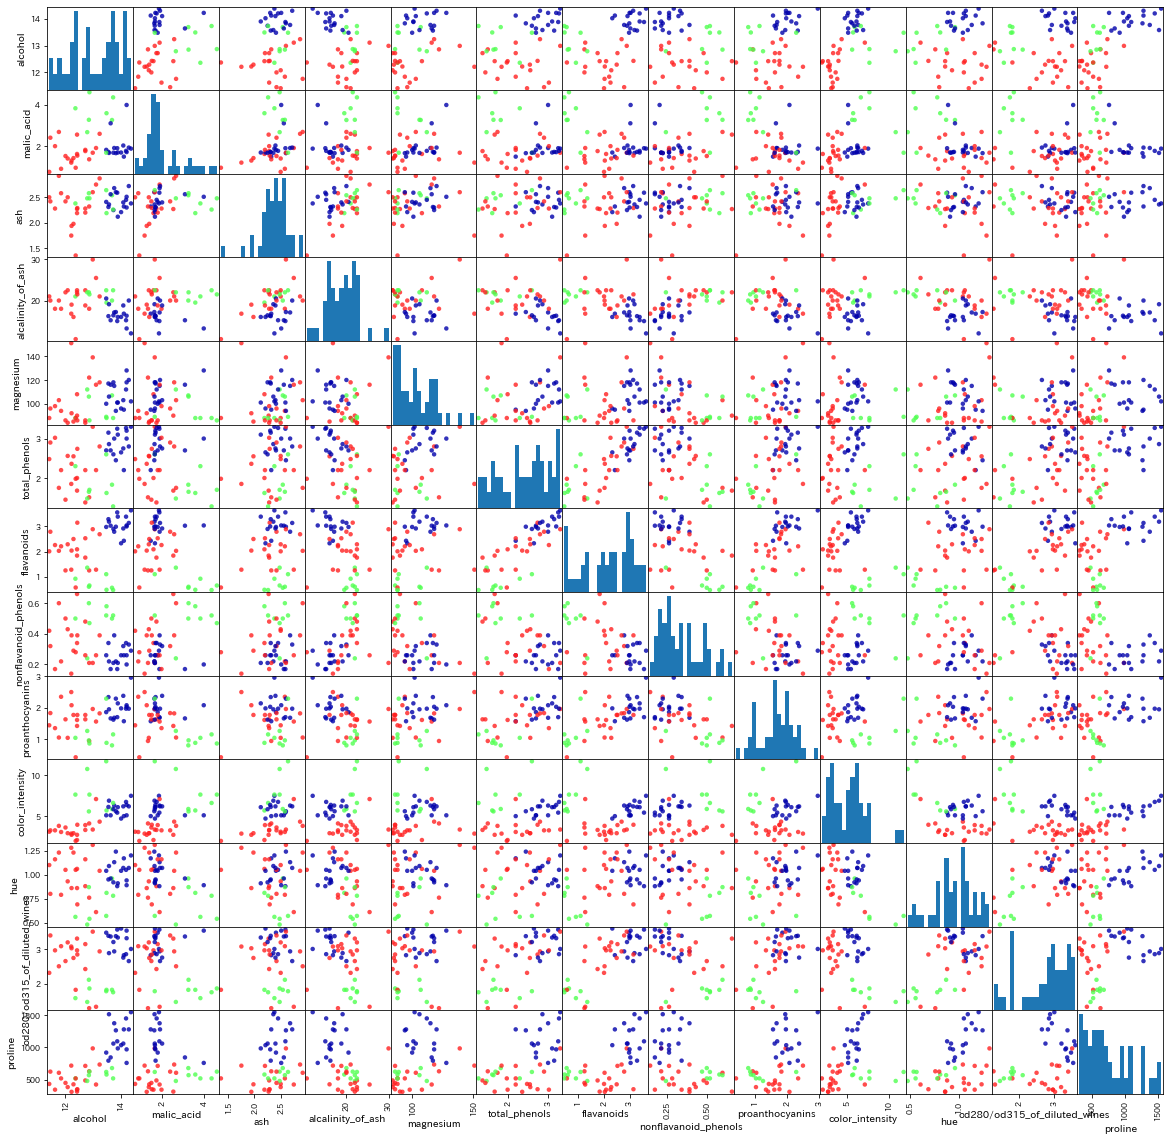

In [24]:
df_x_test=pd.DataFrame(X_test.numpy() ,columns=wine.feature_names)
grr = scatter_matrix(df_x_test, c=y_hat.numpy() , figsize=(20, 20), marker='o', hist_kwds={'bins': 20}, s=20, alpha=.8, cmap=mglearn.cm3)
plt.show()

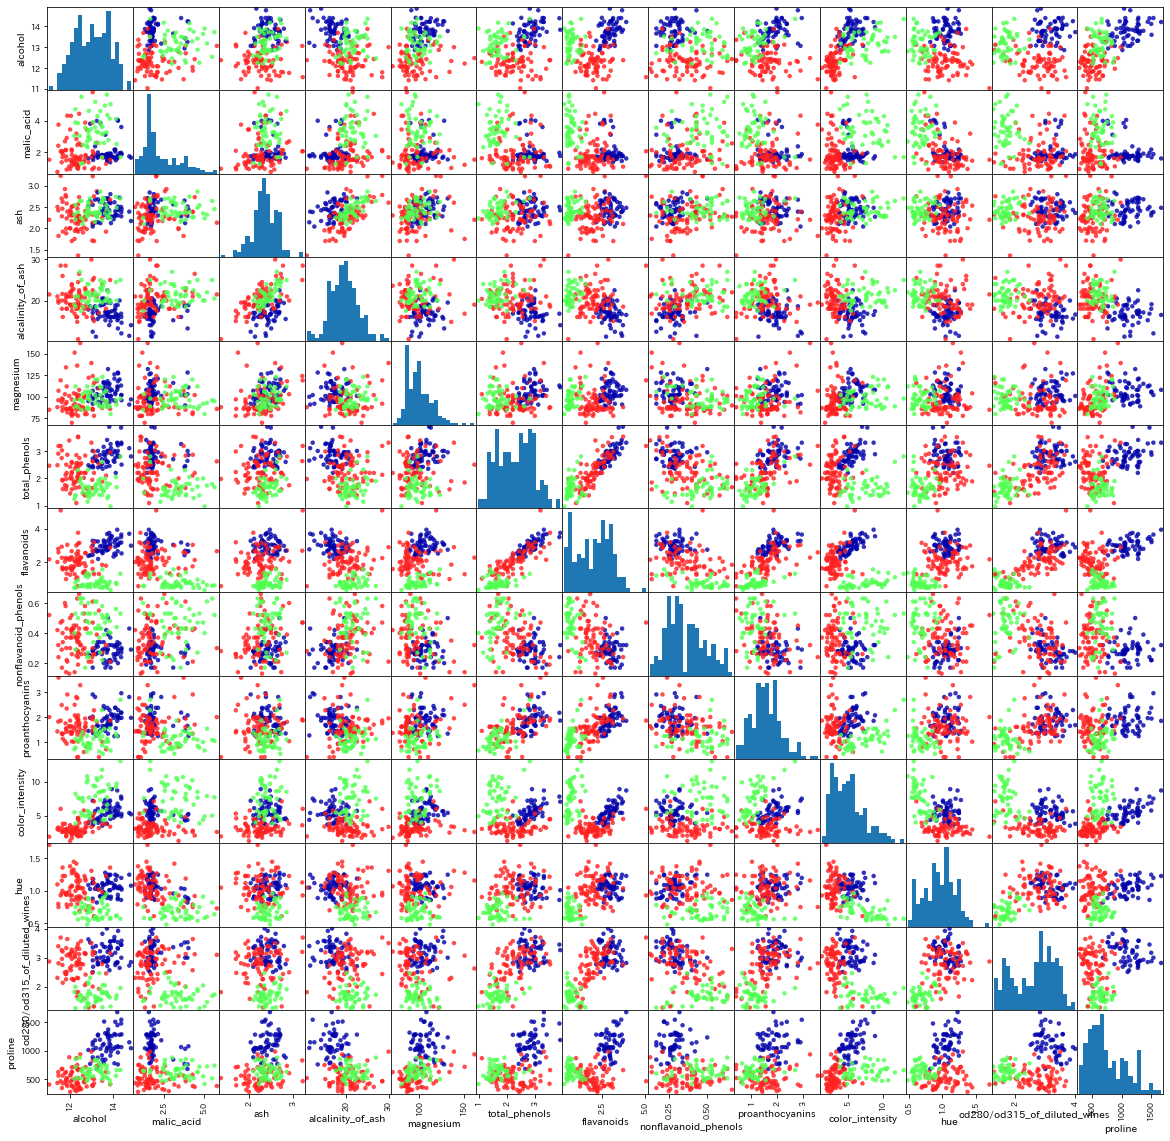

In [25]:
# 全データで予測
y_hat2 = torch.max(model(torch.from_numpy(x).float()).data ,1)[1]
df_x_test=pd.DataFrame(wine_data ,columns=wine.feature_names)
grr = scatter_matrix(df_x_test, c=y_hat2.numpy(), figsize=(20, 20), marker='o', hist_kwds={'bins': 20}, s=20, alpha=.8, cmap=mglearn.cm3)
plt.show()

In [26]:
print(metrics.classification_report(wine.target,y_hat2.numpy() ))  # 正解率など
print('-----')
print(metrics.confusion_matrix(wine.target, y_hat2.numpy() ))     # 行:正解、列:予測

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        59
           1       0.95      1.00      0.97        71
           2       1.00      0.96      0.98        48

    accuracy                           0.98       178
   macro avg       0.98      0.97      0.98       178
weighted avg       0.98      0.98      0.98       178

-----
[[57  2  0]
 [ 0 71  0]
 [ 0  2 46]]


## 予測する

In [27]:
def print_predict(_x , _y):
    print('入力データ',_x)
    y_predict = model(torch.from_numpy(_x).float()).data
    print('予測値(確率)',y_predict)
    print('予測値',torch.max(y_predict ,1)[1])
    print('正解',_y)

In [28]:
# 全データの１件目　　：　Class_0
print_predict(wine_data[0:1] , wine_target[0:1])

入力データ [[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]]
予測値(確率) tensor([[-0.8055, -1.3010, -1.2699]])
予測値 tensor([0])
正解 [0]


In [29]:
# 全データの５９件目：　Class_1
print_predict(wine_data[59:60] , wine_target[59:60])

入力データ [[1.237e+01 9.400e-01 1.360e+00 1.060e+01 8.800e+01 1.980e+00 5.700e-01
  2.800e-01 4.200e-01 1.950e+00 1.050e+00 1.820e+00 5.200e+02]]
予測値(確率) tensor([[-1.2161, -0.8845, -1.2355]])
予測値 tensor([1])
正解 [1]


In [30]:
# 全データの１３０件目：　Class_2
print_predict(wine_data[130:131] , wine_target[130:131])

入力データ [[1.286e+01 1.350e+00 2.320e+00 1.800e+01 1.220e+02 1.510e+00 1.250e+00
  2.100e-01 9.400e-01 4.100e+00 7.600e-01 1.290e+00 6.300e+02]]
予測値(確率) tensor([[-1.2302, -1.0266, -1.0512]])
予測値 tensor([1])
正解 [2]
